#Unique Solution

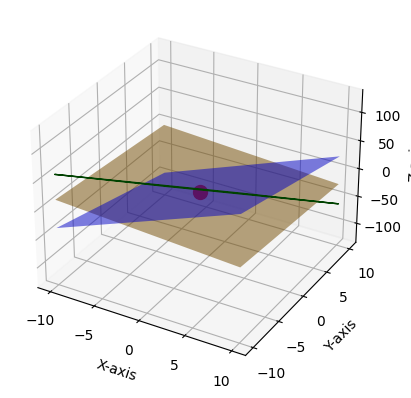

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Define the equations of the planes ( You can change it according to your equations and it will work!)
#But to see the equation intersection is working or not you will have to change in the intersection section too (marked below)
def plane1(x, y):
    return 6*x - 3*y - 3

def plane2(x, y):
    return 3*x - 9*y + 2

def plane3(x, y):
    return -x - y - 3

# Generate points in 3D space
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
x, y = np.meshgrid(x, y)

# Calculate z values for each plane
z1 = plane1(x, y)
z2 = plane2(x, y)
z3 = plane3(x, y)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the planes
ax.plot_surface(x, y, z1, alpha=0.5, rstride=100, cstride=100, color='blue', label='6x - 3y - z = 3')
ax.plot_surface(x, y, z2, alpha=0.5, facecolors='green', rstride=100, cstride=100, label='3x - 9y + 2z = -6')
ax.plot_surface(x, y, z3, alpha=0.5, color='orange', rstride=100, cstride=100, label='x + y + 3z = -9')

# Find the unique solution(change equation matrix here too if you wish to change the equations!)
intersection_point = np.linalg.solve([[6, -3, -1], [3, -9, 2], [1, 1, 3]], [3, -6, -9])

# Highlight the solution in bright red
ax.scatter(intersection_point[0], intersection_point[1], intersection_point[2], color='red', s=100, label='Unique Solution')

# Set labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# This part of the code is for A)Rotating the graph B)Storing the animation in an mp4 file.

# Function to update the plot for animation
def update(frame):
    ax.view_init(elev=10, azim=frame)

# Create animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 1), interval=50)

# Show the plot
#after running wait for 2 minutes, once the run is complete open the uniqueSolution.mp4 created -> shows the rotating animation
plt.show()
ani.save('uniqueSolution.mp4', writer='ffmpeg')



The intersection of the three planes will give us a plane

#Infinite Number of Solutions

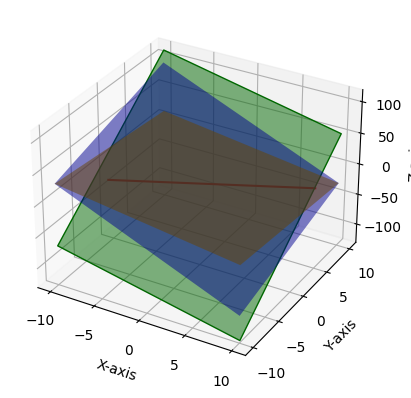

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Define the equations
def eq1(x, y, z):
    return -(6*x - 3*y - z - 3)

def eq2(x, y, z):
    return -(3*x - 9*y + 2*z + 6)

def eq3(x, y, z):
    return -(2*x + y - z - 3)

# Generate points in 3D space
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
x, y = np.meshgrid(x, y)

# Calculate z values for each equation
z1 = eq1(x, y, 0)
z2 = eq2(x, y, 0)
z3 = eq3(x, y, 0)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the planes
ax.plot_surface(x, y, z1, alpha=0.5, rstride=100, cstride=100, color='blue', label='6x - 3y - z = 3')
ax.plot_surface(x, y, z2, alpha=0.5, facecolors='green', rstride=100, cstride=100, label='3x - 9y + 2z = -6')
ax.plot_surface(x, y, z3, alpha=0.5, color='orange', rstride=100, cstride=100, label='2x + y - z = 3')

# Set labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Solve the system of equations
A = np.array([[6, -3, -1], [3, -9, 2], [2, 1, -1]])
b = np.array([3, -6, 3])

try:
    # will get a line for the case where it is an infinite number of solutions
    solution, residuals, rank, singular_values = np.linalg.lstsq(A, b, rcond=None)

    # Adjusted line parameterization for the infinite solution
    t = np.linspace(-10, 10, 100)
    line_direction = singular_values / np.linalg.norm(singular_values)
    line_parameterization = solution + t[:, np.newaxis] * line_direction.reshape(1, -1)

    # Plot the line on our existing 3D plot
    ax.plot(line_parameterization[:, 0], line_parameterization[:, 1], line_parameterization[:, 2], color='red', label='Infinite Solution Line')

except np.linalg.LinAlgError:
    print("The system does not have an infinite solution.")

# Function to update the plot for animation
def update(frame):
    ax.view_init(elev=10, azim=frame)

# Create animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 1), interval=50)

# Show the plot
# after running, wait for 2 minutes, once the run is complete open the infiniteSolutions.mp4 created -> shows the rotating animation
plt.show()
ani.save('infiniteSolutions.mp4', writer='ffmpeg')


#No Solution

As you can clearly see since all three don't have any common intersection, there is no solution for this equation

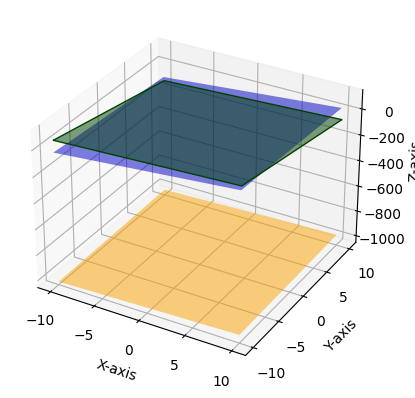

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Define the equations of the planes
def plane1(x, y):
    return 6*x - 3*y - 3

def plane2(x, y):
    return 3*x - 9*y + 2

def plane3(x, y):
    return 2*x + y - 1000

# Generate points in 3D space
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
x, y = np.meshgrid(x, y)

# Calculate z values for each plane
z1 = plane1(x, y)
z2 = plane2(x, y)
z3 = plane3(x, y)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the planes
ax.plot_surface(x, y, z1, alpha=0.5, rstride=100, cstride=100, color='blue', label='6x - 3y - z = 3')
ax.plot_surface(x, y, z2, alpha=0.5, facecolors='green', rstride=100, cstride=100, label='3x - 9y + 2z = -6')
ax.plot_surface(x, y, z3, alpha=0.5, color='orange', rstride=100, cstride=100, label='2x + y - z = -1')

# Set labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# This part of the code is for A)Rotating the graph B)Storing the animation in an mp4 file.

# Function to update the plot for animation
def update(frame):
    ax.view_init(elev=10, azim=frame)

# Create animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 1), interval=50)

# Show the plot
# after running wait for 2 minutes, once the run is complete open the noSolution.mp4 created -> shows the rotating animation
plt.show()
ani.save('noSolution.mp4', writer='ffmpeg')
